# 1. Data and preprocessing

In [1]:
# loading necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use(matplotlib.get_data_path()+'/stylelib/apa.mplstyle') # selecting the style sheet

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('thl_recoded.csv')
data.head()

,kannabis,alcohol_use,nuuska,cigarette,e_cigarette,prob_country,prob_resident,risk_of_use,risk_of_try,cannabis_access,...,household_1.0,household_2.0,household_3.0,drug_punishment_1.0,drug_punishment_2.0,drug_punishment_3.0,drug_punishment_4.0,violence_treat_1.0,violence_treat_2.0,violence_treat_3.0
0,0.0,3.0,1.0,1.0,1.0,3.0,2.0,24.0,13.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,1.0,1.0,1.0,3.0,2.0,23.0,17.0,3.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,5.0,1.0,2.0,1.0,4.0,3.0,24.0,18.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1.0,7.0,2.0,2.0,1.0,3.0,2.0,22.0,12.0,3.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,5.0,1.0,1.0,1.0,3.0,2.0,24.0,16.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [3]:
selected_features = ['kannabis','alcohol_use',
 'nuuska',
 'free_offer_1',
 'e_cigarette',
 'prob_country',
 'purchase_offer_1',
 'risk_of_use',
 'risk_of_try',
 'drug_user_friend_1',
 'drug_punishment_1.0']

data = data[selected_features]
data.head()

,kannabis,alcohol_use,nuuska,free_offer_1,e_cigarette,prob_country,purchase_offer_1,risk_of_use,risk_of_try,drug_user_friend_1,drug_punishment_1.0
0,0.0,3.0,1.0,0.0,1.0,3.0,0.0,24.0,13.0,0.0,0.0
1,0.0,1.0,1.0,0.0,1.0,3.0,0.0,23.0,17.0,1.0,0.0
2,0.0,5.0,1.0,0.0,1.0,4.0,0.0,24.0,18.0,1.0,0.0
3,1.0,7.0,2.0,1.0,1.0,3.0,0.0,22.0,12.0,0.0,0.0
4,0.0,5.0,1.0,0.0,1.0,3.0,0.0,24.0,16.0,0.0,0.0


In [4]:
 # Kannabis use
data['kannabis'].value_counts(normalize= True)

0.0    0.914525
1.0    0.085475
Name: kannabis, dtype: float64

In [5]:
# resample by adding samples to minority class using SMOTE
from collections import Counter
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

from sklearn.model_selection import train_test_split
X, y = data.iloc[:, 1:], data.iloc[:, 0]

resample = SMOTETomek(tomek=TomekLinks(sampling_strategy='not majority'))
X_oversamp, Y_over_samp = resample.fit_resample(X, y)



#split data train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_oversamp,
                                                    Y_over_samp,
                                                    test_size=0.3,
                                                    random_state = 10)



print(f"Class counts after resampling {Counter( Y_over_samp)}")

Class counts after resampling Counter({0.0: 2953, 1.0: 2952})


In [6]:
print('Dimension of train data: ', X_train.shape)
print('Dimension of test data: ', X_test.shape)

Dimension of train data:  (4133, 10)
Dimension of test data:  (1772, 10)


In [7]:
# necessary for XGBoost 
# removed - from categoric variable names (age bins)
#X_train.columns[X_train.columns.str.contains("[\[\]<]")]
X_train.columns = X_train.columns.str.translate("".maketrans({"[":"{", "]":"}","<":"^"}))

In [8]:
# Scaling
from sklearn.preprocessing import RobustScaler

robust = RobustScaler()
X_train_std = robust.fit_transform(X_train)
X_test_std = robust.transform(X_test)

# Helper functions

In [9]:
def plot_matrics(y_pred):    
    
    #y_pred = pipeline.predict(X_test)
    from sklearn import metrics
    from sklearn.metrics import roc_auc_score,precision_recall_curve,roc_curve
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import accuracy_score

    print('Accuracy:', np.round(metrics.accuracy_score(y_test, y_pred),4))
    print('Precision:', np.round(metrics.precision_score(y_test, y_pred,average='weighted'),4))
    print('Recall:', np.round(metrics.recall_score(y_test, y_pred,
                                               average='weighted'),4))
    print('F1 Score:', np.round(metrics.f1_score(y_test, y_pred,
                                               average='weighted'),4))
    print('Cohen Kappa Score:', np.round(metrics.cohen_kappa_score(y_test, y_pred),4))
    print('Matthews Corrcoef:', np.round(metrics.matthews_corrcoef(y_test, y_pred),4)) 

    from sklearn.metrics import roc_auc_score
    print("roc_auc_score:", roc_auc_score(y_test, y_pred, average=None))

    print('\t\tClassification Report:\n', metrics.classification_report(y_pred,y_test))


    from sklearn.metrics import confusion_matrix
    print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))


    #Plot Confusion Matrix
    from sklearn.metrics import confusion_matrix
    from io import BytesIO #neded for plot
    import seaborn as sns; sns.set()
    import matplotlib.pyplot as plt

    mat = confusion_matrix(y_test, y_pred)
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)


    plt.xlabel('true label')
    plt.ylabel('predicted label');

    plt.savefig("Confusion.jpg")
    # Save SVG in a fake file object.
    f = BytesIO()
    plt.savefig(f, format="svg")

In [10]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform

In [11]:
class RandomSearch(object):
    
    def __init__(self,X_train,y_train,model,hyperparameters):
        
        self.X_train = X_train
        self.y_train = y_train
        self.model = model
        self.hyperparameters = hyperparameters
        
    def RandomSearch(self):
        # Create randomized search 10-fold cross validation and 100 iterations
        cv = 10
        clf = RandomizedSearchCV(self.model,
                                 self.hyperparameters,
                                 random_state=1,
                                 n_iter=100,
                                 cv=cv,
                                 verbose=0,
                                 n_jobs=-1,
                                 )
        # Fit randomized search
        best_model = clf.fit(self.X_train, self.y_train)
        message = (best_model.best_score_, best_model.best_params_)
        print("Best: %f using %s" % (message))

        return best_model,best_model.best_params_
    
    def BestModelFeatures(self):
        best_model,_ = self.RandomSearch()
        best_estimator = best_model.best_estimator_
        best_features = best_estimator.feature_importances_
        return best_features
        

    
    def BestModelPridict(self,X_test):
        
        best_model,_ = self.RandomSearch()
        pred = best_model.predict(X_test)
        return pred
    




In [12]:
def feature_importance_plot(feature_importance):   
    # Apa style
    matplotlib.style.use(matplotlib.get_data_path()+'/stylelib/apa.mplstyle') # selecting the style sheet

    # Plot feature importance
    fig = plt.figure(figsize=(15,10))

    #feature_importance = model.feature_importances_
    # make importances relative to max importance
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    #feature_importance = 100.0 * (feature_importance)


    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    plt.subplot(1, 2, 2)
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, X_train.columns[sorted_idx]) #boston.feature_names[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')
    plt.savefig("img/vip.jpg")
    

    plt.show()

## Logistic Regression

C : Regularization value, the more, the stronger the regularization(double).


RegularizationType: Can be either "L2" or “L1”. Default is “L2”.

In [13]:
from sklearn.linear_model import LogisticRegression


# model
model = LogisticRegression(max_iter= 1000)
# Create regularization penalty space
penalty = [ 'l2'] # 'l1',

# Create regularization hyperparameter distribution using uniform distribution
C = uniform(loc=0, scale=4)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)



In [14]:
LR_RandSearch = RandomSearch(X_train_std,y_train, model,hyperparameters)
# LR_best_model,LR_best_params = LR_RandSearch.RandomSearch()
Prediction_LR = LR_RandSearch.BestModelPridict(X_test_std)

Best: 0.910719 using {'C': 0.10955037279170465, 'penalty': 'l2'}


In [15]:
def floatingDecimals(f_val, dec=3):
        prc = "{:."+str(dec)+"f}" #first cast decimal as str
    #     print(prc) #str format output is {:.3f}
        return float(prc.format(f_val))

In [16]:
print('prediction on test set is:' ,floatingDecimals((y_test == Prediction_LR).mean(),7))

prediction on test set is: 0.9018059


Accuracy: 0.9018
Precision: 0.9021
Recall: 0.9018
F1 Score: 0.9018
Cohen Kappa Score: 0.8036
Matthews Corrcoef: 0.8038
roc_auc_score: 0.9019947188124464
		Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.91      0.90       884
         1.0       0.91      0.89      0.90       888

    accuracy                           0.90      1772
   macro avg       0.90      0.90      0.90      1772
weighted avg       0.90      0.90      0.90      1772

Confusion Matrix:
 [[807  97]
 [ 77 791]]


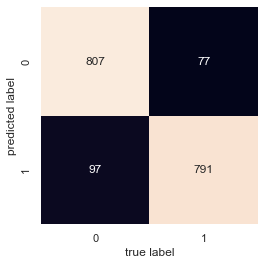

In [17]:
plot_matrics(Prediction_LR)

# Feature importance and association

Hocam yukaridaki kisim analizde kullandigimiz ayni parametreler, sadece feature-lari siralayalim ve negative/positive iliski gorulsun diye feature selection icin kullandigim modeli buraya ekledim. 

**Farki:**
- penalty 'l1' iken yukaridakine uysun diye 'l2' yapildi
- 'l1' yapinca da ayni sonuc cikiyor, hangisini kullanmak gerekiyor bilemedim.

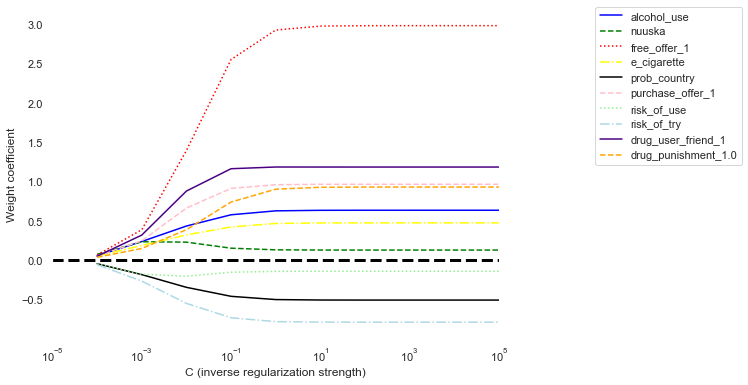

In [18]:
import matplotlib.pyplot as plt
matplotlib.style.use(matplotlib.get_data_path()+'/stylelib/apa.mplstyle') # selecting the style sheet



fig = plt.figure(figsize=(8, 6))
fig.patch.set_facecolor('white')

ax = plt.subplot(111)


# 10 colors
colors = ['blue', 'green', 'red', 
          'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'indigo', 'orange']


"""
# 13 colors
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

"""

"""
# 15 colors
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8',
          '#f58231', '#911eb4', '#46f0f0', '#f032e6', 
          '#bcf60c', '#fabebe', '#008080', '#e6beff',
          '#9a6324', '#fffac8', '#800000', '#aaffc3',
          '#808000']

"""


weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l2', C=10.**c, solver='liblinear', #  C=10.**c,
                             random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[0])
    params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=data.columns[column + 1],
             color=color)

    
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('Weight coefficient')
plt.xlabel('C (inverse regularization strength)')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)


plt.savefig('img/vip_lr.jpg', dpi=300, 
            bbox_inches='tight', pad_inches=0.2)

plt.show()